# Setup

In [2]:
# Commonly used libraries
import numpy as np
import pandas as pd
import os

# From scikitlearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

# to keep stability
np.random.seed(42)

# To plot 
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Ignore useless warnings 
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Loading  and Overview of the Data 

In [6]:
housing = pd.read_csv('housing.csv')

In [7]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


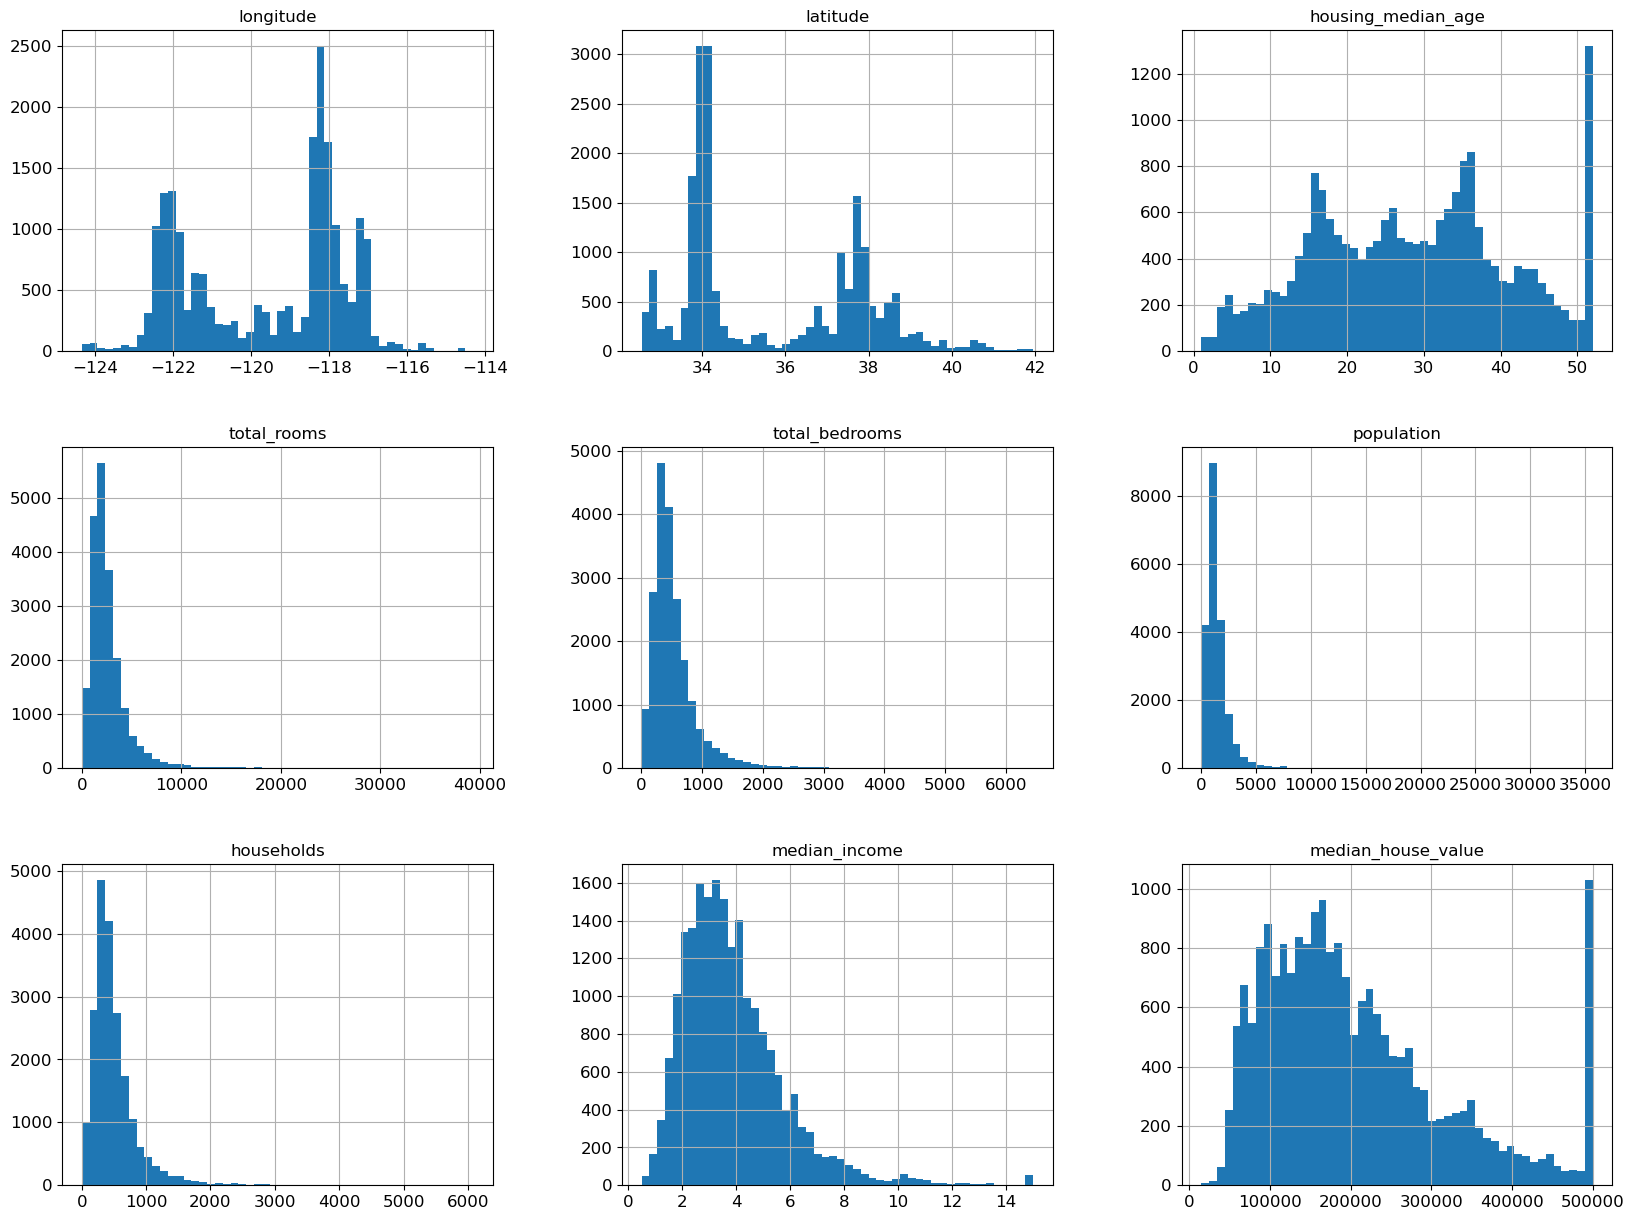

In [11]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [12]:
## For illustration only. Sklearn has train_test_split()

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

#### We will use the scikit learn option, but keep in mind that probably the best solution is to use each instance’s identifier to decide whether or not it should go in the test set (assuming instances have a unique and immutable identifier)

#### Also, So far we have considered purely random sampling methods. This is generally fine if your dataset is large enough (especially relative to the number of attributes), but if it is not, you run the risk of introducing a significant sampling bias. 

In [14]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [15]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


#### Now, we suppose experts in real estate have said that median income is very important in predicting house price, so we need to create categories for the continous variable we have 

#### We can check if it is worthy to split train and test based on this variable then...

<Axes: >

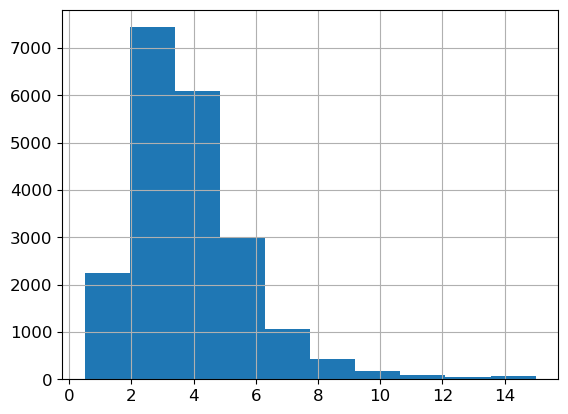

In [17]:
housing["median_income"].hist()

#### The following code creates an income category attribute by dividing the median income by 1.5 (to limit the number of income categories), and rounding up using ceil (to have discrete categories), and then merging all the categories greater than 5 into category 5:

In [19]:
# Divide by 1.5 to limit the number of income categories
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
# Label those above 5 as 5
housing["income_cat"].where(housing["income_cat"] < 5, 5.0,)

0        5.0
1        5.0
2        5.0
3        4.0
4        3.0
        ... 
20635    2.0
20636    2.0
20637    2.0
20638    2.0
20639    2.0
Name: income_cat, Length: 20640, dtype: float64

In [20]:
housing["income_cat"].value_counts()

income_cat
3.0     7236
2.0     6581
4.0     3639
5.0     1423
1.0      822
6.0      532
7.0      189
8.0      105
9.0       50
11.0      49
10.0      14
Name: count, dtype: int64

<Axes: >

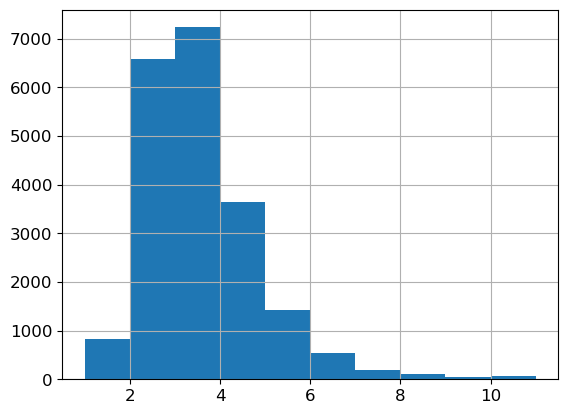

In [21]:
housing["income_cat"].hist()

In [22]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [23]:
# we can look at the income categorya proportions in the test set and then in the full housing dataset

strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3.0     0.350533
2.0     0.318798
4.0     0.176357
5.0     0.069041
1.0     0.039729
6.0     0.025678
7.0     0.009205
8.0     0.005087
11.0    0.002422
9.0     0.002422
10.0    0.000727
Name: count, dtype: float64

In [24]:
housing["income_cat"].value_counts() / len(housing)

income_cat
3.0     0.350581
2.0     0.318847
4.0     0.176308
5.0     0.068944
1.0     0.039826
6.0     0.025775
7.0     0.009157
8.0     0.005087
9.0     0.002422
11.0    0.002374
10.0    0.000678
Name: count, dtype: float64

# Discover and visualize the data to gain insights

#### This phase can be very long, it needs to be done well, and in this very first example we will not focus on this part. Instead, In Lecture 2, we will play a bit more with Data PreProcessing Treatments

In [27]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

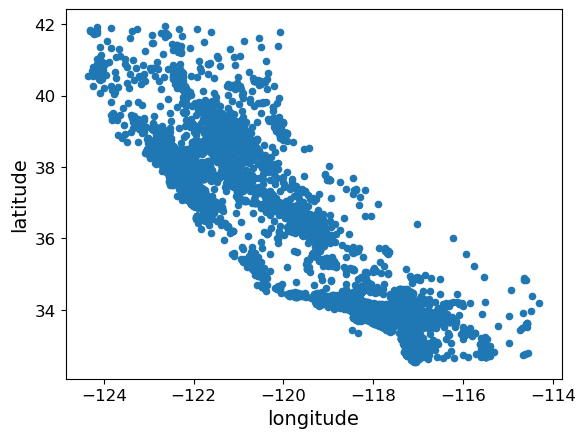

In [28]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

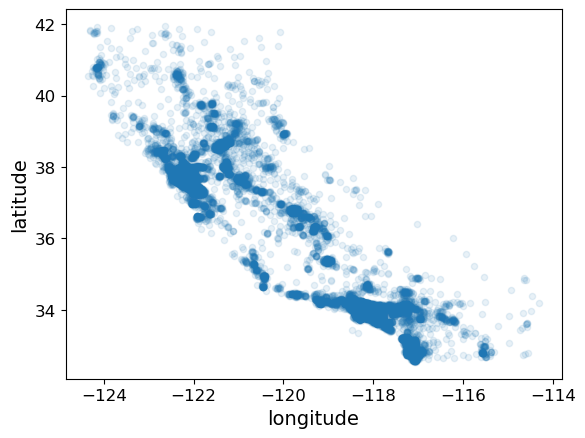

In [29]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

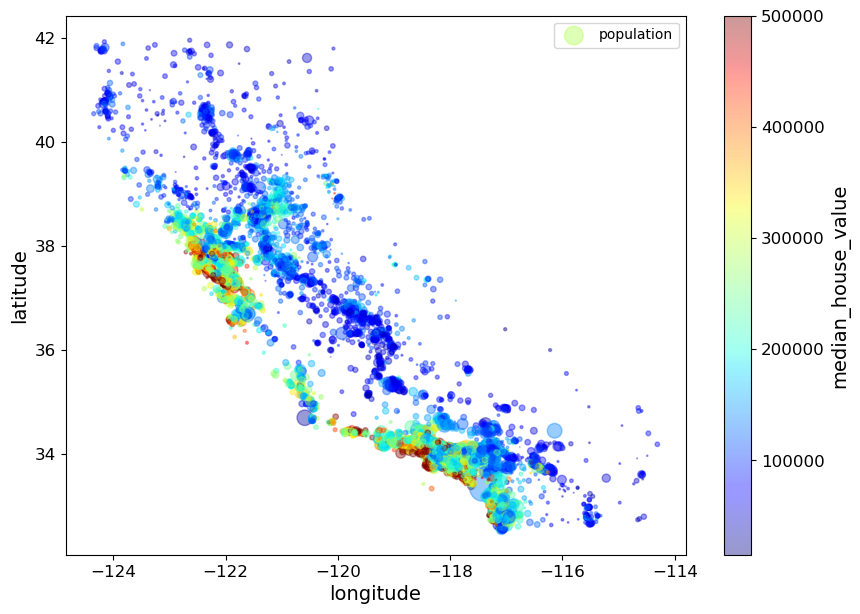

In [30]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

In [31]:
#use only numeric attributes
numerical = housing.drop("ocean_proximity", axis=1)
# Create a correlation matrix
corr_matrix = numerical.corr()


In [32]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687474
income_cat            0.667208
total_rooms           0.135989
housing_median_age    0.111770
households            0.065841
total_bedrooms        0.049177
population           -0.024765
longitude            -0.045056
latitude             -0.144684
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

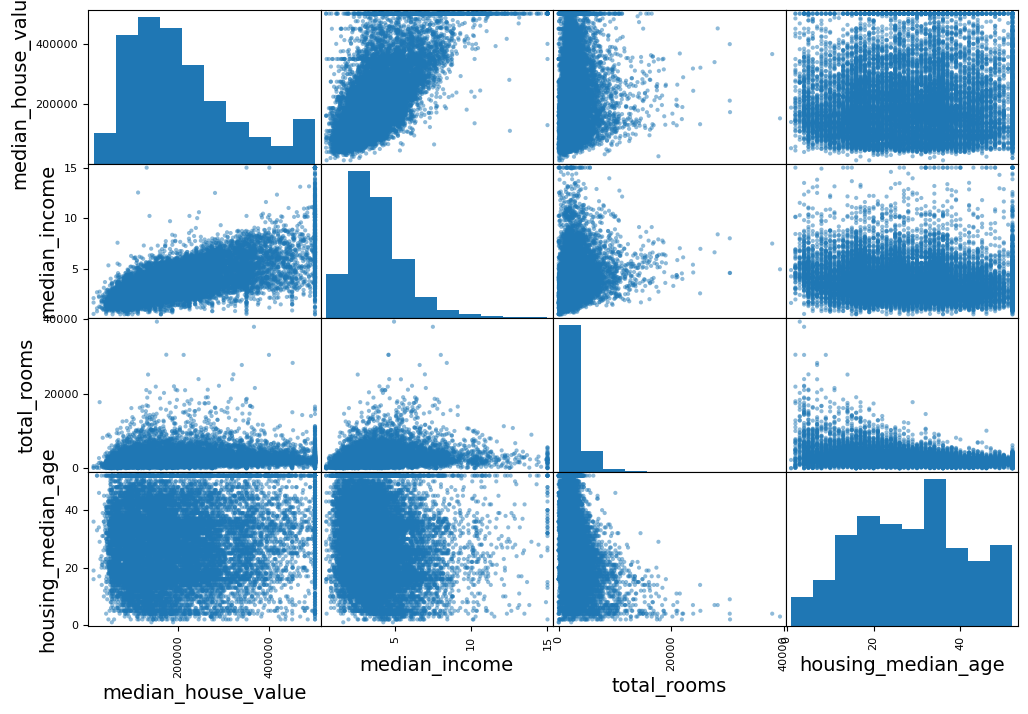

In [33]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

# Prepare the data for Machine Learning algorithms

In [35]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

In [36]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN,2.0
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN,4.0
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN,4.0
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND,2.0
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN,3.0


In [37]:
# option 1 - to drop missing values
#sample_incomplete_rows.dropna(subset=["total_bedrooms"])    

In [38]:
# option 2 - to drop missing values
#sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2

In [39]:
# option 3 - fill nan with median in specific column
#median = housing["total_bedrooms"].median()
#sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) 
#sample_incomplete_rows

In [40]:
# option 4 - use imputer in the whole data, but we need to revome categorical feature (missing) before, 
# because it will only work on numerical data

imputer = SimpleImputer(strategy="median")

Remove the text attribute because median can only be calculated on numerical attributes:

In [42]:
housing_num = housing.drop('ocean_proximity', axis=1)
# alternatively: housing_num = housing.select_dtypes(include=[np.number])

In [43]:
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,2.0
15698,-122.46,37.79,52.0,899.0,96.0,304.0,110.0,14.2959,10.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,3.0
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,4.0
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,2.0
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,3.0
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,3.0


In [44]:
imputer.fit(housing_num)

# The imputer has simply computed the median of each attribute and stored the result in its statistics_ 
# instance variable. Only the total_bedrooms attribute had missing values, but we cannot be sure that 
# there won’t be any missing values in new data after the system goes live, so it is safer to 
# apply the imputer to all the numerical attributes

SimpleImputer(strategy='median')

In [45]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2122.    ,  434.    , 1166.    ,
        408.    ,    3.5409,    3.    ])

Check that this is the same as manually computing the median of each attribute:

In [47]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2122.    ,  434.    , 1166.    ,
        408.    ,    3.5409,    3.    ])

In [48]:
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,2.0
15698,-122.46,37.79,52.0,899.0,96.0,304.0,110.0,14.2959,10.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,3.0
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,4.0
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,2.0
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,3.0
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,3.0


Transform the training set:

In [50]:
# we use the “trained” imputer to transform the training set by replacing missing values by the learned medians:
X = imputer.transform(housing_num)

# The result is a plain Numpy array containing the transformed features. If you want to put it back into 
# a Pandas DataFrame, it’s simple:

In [51]:
X

array([[-121.89  ,   37.29  ,   38.    , ...,  339.    ,    2.7042,
           2.    ],
       [-122.46  ,   37.79  ,   52.    , ...,  110.    ,   14.2959,
          10.    ],
       [-117.2   ,   32.77  ,   31.    , ...,  462.    ,    2.8621,
           2.    ],
       ...,
       [-116.4   ,   34.09  ,    9.    , ...,  765.    ,    3.2723,
           3.    ],
       [-118.01  ,   33.82  ,   31.    , ...,  356.    ,    4.0625,
           3.    ],
       [-122.45  ,   37.77  ,   52.    , ...,  639.    ,    3.575 ,
           3.    ]])

In [52]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index = list(housing.index.values))
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,2.0
15698,-122.46,37.79,52.0,899.0,96.0,304.0,110.0,14.2959,10.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,3.0


Now let's preprocess the categorical input feature, `ocean_proximity`:

In [54]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
15698,NEAR BAY
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
9026,NEAR OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [55]:
# One option is to use OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [3.],
       [4.],
       [1.],
       [0.],
       [1.],
       [4.],
       [1.],
       [0.],
       [0.]])

In [56]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [57]:
# Another option is to use OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

By default, the `OneHotEncoder` class returns a sparse array, but we can convert it to a dense array if needed by calling the `toarray()` method:

In [59]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

Alternatively, you can set `sparse=False` when creating the `OneHotEncoder`:

In [61]:
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [62]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Now let's build a pipeline for preprocessing the numerical attributes:

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [65]:
housing_num_tr

array([[-1.15788621,  0.77388697,  0.74440696, ..., -0.42193926,
        -0.61567811, -0.83878249],
       [-1.44259512,  1.0077626 ,  1.85708974, ..., -1.03082399,
         5.48832516,  5.30005131],
       [ 1.18471864, -1.3403487 ,  0.18806557, ..., -0.09489638,
        -0.5325305 , -0.83878249],
       ...,
       [ 1.58431009, -0.72291704, -1.56043594, ...,  0.71074586,
        -0.31652576, -0.07142826],
       [ 0.7801323 , -0.84920988,  0.18806557, ..., -0.37673821,
         0.09958088, -0.07142826],
       [-1.43760023,  0.99840757,  1.85708974, ...,  0.37572632,
        -0.1571288 , -0.07142826]])

In [66]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [67]:
housing_prepared

array([[-1.15788621,  0.77388697,  0.74440696, ...,  0.        ,
         0.        ,  0.        ],
       [-1.44259512,  1.0077626 ,  1.85708974, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.18471864, -1.3403487 ,  0.18806557, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58431009, -0.72291704, -1.56043594, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.7801323 , -0.84920988,  0.18806557, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43760023,  0.99840757,  1.85708974, ...,  0.        ,
         1.        ,  0.        ]])

In [68]:
housing_prepared.shape

(16512, 14)

# Select and train a model 

In [70]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [71]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [212181.82938101 659195.64068219 212557.36715274  60844.49648447
 190259.14032616]


Compare against the actual values:

In [73]:
print("Labels:", list(some_labels))

Labels: [286600.0, 500001.0, 196900.0, 46300.0, 254500.0]


In [74]:
some_data_prepared

array([[-1.15788621,  0.77388697,  0.74440696, -0.49193928, -0.44661253,
        -0.63588742, -0.42193926, -0.61567811, -0.83878249,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [-1.44259512,  1.0077626 ,  1.85708974, -0.80229001, -1.06646346,
        -0.99850369, -1.03082399,  5.48832516,  5.30005131,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ],
       [ 1.18471864, -1.3403487 ,  0.18806557, -0.31380075, -0.15491798,
        -0.43403698, -0.09489638, -0.5325305 , -0.83878249,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ],
       [-0.01905059,  0.31549074, -0.28879848, -0.3625105 , -0.39799677,
         0.03397023, -0.38471487, -1.04763493, -0.83878249,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.4904285 , -0.65743187, -0.92461721,  1.83870654,  2.40713252,
         2.71250768,  2.56664777, -0.44164211, -0.07142826,  1.        ,
         0.        ,  0.  

In [75]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68941.00570298471

In [76]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49874.93027485913

In [77]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [78]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

# Fine-tune your model

In [80]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [81]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [64829.0888121  66855.22971671 71440.65799034 70558.92200521
 70931.16687133 76535.04728977 70650.69435271 71662.74486777
 71059.15264569 69917.51647763]
Mean: 70444.02210292518
Standard deviation: 2914.358967903409


In [82]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [67488.65952652 66473.38394695 67899.22895413 74352.59089015
 71727.38013182 70460.51908616 65424.86345221 68059.95267149
 71485.97696681 67987.10817042]
Mean: 69135.96637966443
Standard deviation: 2622.747344153331


In [83]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try combinations of hyperparameters including max_depth
    {'max_features': [4, 6, 8], 'max_depth': [5, 10, None]},
    # then try other combinations including max_depth
    {'max_features': [2, 3, 4], 'max_depth': [5, 10]},
    # then try different max_features alone
    {'max_features': [2, 3, 4]}
]

tree_reg = DecisionTreeRegressor(random_state=42)
# train across 5 folds
grid_search = GridSearchCV(tree_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid=[{'max_depth': [5, 10, None],
                          'max_features': [4, 6, 8]},
                         {'max_depth': [5, 10], 'max_features': [2, 3, 4]},
                         {'max_features': [2, 3, 4]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [84]:
#preparing test set
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)


In [85]:
!pip install optuna


In [86]:
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    max_depth = trial.suggest_int("max_depth", 2, 20)
    max_features = trial.suggest_int("max_features", 1, housing_prepared.shape[1])

    model = DecisionTreeRegressor(
        max_depth=max_depth,
        max_features=max_features,
        random_state=42
    )

    score = cross_val_score(model, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv=5)
    rmse = np.sqrt(-score.mean())
    return rmse

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)

print("Optuna best params:", study.best_params)
print("Optuna best score (RMSE):", study.best_value)


[I 2025-07-18 08:33:37,151] A new study created in memory with name: no-name-fe57b971-4b67-4aef-8f2f-724a630fbbad
[I 2025-07-18 08:33:37,293] Trial 0 finished with value: 84694.33565762617 and parameters: {'max_depth': 17, 'max_features': 1}. Best is trial 0 with value: 84694.33565762617.
[I 2025-07-18 08:33:37,429] Trial 1 finished with value: 67489.56848281414 and parameters: {'max_depth': 10, 'max_features': 3}. Best is trial 1 with value: 67489.56848281414.
[I 2025-07-18 08:33:37,491] Trial 2 finished with value: 86146.3748237566 and parameters: {'max_depth': 9, 'max_features': 1}. Best is trial 1 with value: 67489.56848281414.
[I 2025-07-18 08:33:37,550] Trial 3 finished with value: 81772.96348267459 and parameters: {'max_depth': 5, 'max_features': 3}. Best is trial 1 with value: 67489.56848281414.
[I 2025-07-18 08:33:38,294] Trial 4 finished with value: 70323.51190197025 and parameters: {'max_depth': 18, 'max_features': 12}. Best is trial 1 with value: 67489.56848281414.
[I 2025-

Optuna best params: {'max_depth': 11, 'max_features': 13}
Optuna best score (RMSE): 63158.34953335897


In [87]:
from sklearn.metrics import r2_score

optuna_model = DecisionTreeRegressor(
    max_depth=study.best_params["max_depth"],
    max_features=study.best_params["max_features"],
    random_state=42
)
optuna_model.fit(housing_prepared, housing_labels)

final_predictions_opt = optuna_model.predict(X_test_prepared)

#calculating rmse and r sqrt for optuna
final_rmse_opt = np.sqrt(mean_squared_error(y_test, final_predictions_opt))
final_r2_opt = r2_score(y_test, final_predictions_opt)

# print results
print("Optuna RMSE:", final_rmse_opt)
print("Optuna R²:", final_r2_opt)

#calculating cı for optuna
from scipy import stats
squared_errors_opt = (final_predictions_opt - y_test) ** 2
m_opt = len(squared_errors_opt)

ci_opt_squared = stats.t.interval(0.95, m_opt - 1,
                                  loc=np.mean(squared_errors_opt),
                                  scale=stats.sem(squared_errors_opt))
ci_opt = np.sqrt(ci_opt_squared)

print(f"Optuna 95% CI: [{ci_opt[0]:.2f}, {ci_opt[1]:.2f}]")


Optuna RMSE: 60832.81740244743
Optuna R²: 0.718359327262343
Optuna 95% CI: [58111.15, 63437.83]


In [88]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'max_depth': [3, 5, 10, None],
    'max_features': randint(1, 8),
}

tree_reg = DecisionTreeRegressor(random_state=42)
rnd_search = RandomizedSearchCV(tree_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5,
                                scoring='neg_mean_squared_error',
                                random_state=42,
                                return_train_score=True)
rnd_search.fit(housing_prepared, housing_labels)


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   param_distributions={'max_depth': [3, 5, 10, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000192378BEF30>},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error')

The best hyperparameter combination found:

In [90]:
grid_search.best_params_

{'max_depth': 10, 'max_features': 8}

In [91]:
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=10, max_features=8, random_state=42)

Let's look at the score of each hyperparameter combination tested during the grid search:

In [93]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

76328.42001144038 {'max_depth': 5, 'max_features': 4}
73570.81175697397 {'max_depth': 5, 'max_features': 6}
72186.71134066785 {'max_depth': 5, 'max_features': 8}
66130.07190896818 {'max_depth': 10, 'max_features': 4}
66293.0446896208 {'max_depth': 10, 'max_features': 6}
64899.80530335235 {'max_depth': 10, 'max_features': 8}
76070.79081398422 {'max_depth': None, 'max_features': 4}
75478.7804109748 {'max_depth': None, 'max_features': 6}
72333.15816849274 {'max_depth': None, 'max_features': 8}
82186.30824697908 {'max_depth': 5, 'max_features': 2}
81772.96348267459 {'max_depth': 5, 'max_features': 3}
76328.42001144038 {'max_depth': 5, 'max_features': 4}
72110.31052037283 {'max_depth': 10, 'max_features': 2}
67489.56848281414 {'max_depth': 10, 'max_features': 3}
66130.07190896818 {'max_depth': 10, 'max_features': 4}
79968.80378120371 {'max_features': 2}
74260.46924705665 {'max_features': 3}
76070.79081398422 {'max_features': 4}


In [94]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013126,0.000673,0.001000,9.725608e-07,5,4,"{'max_depth': 5, 'max_features': 4}",-5.370995e+09,-5.787070e+09,-6.279724e+09,...,-5.826028e+09,3.430546e+08,14,-5.793249e+09,-5.693953e+09,-5.570800e+09,-5.773662e+09,-5.613494e+09,-5.689031e+09,8.687051e+07
1,0.021479,0.002045,0.001203,4.097775e-04,5,6,"{'max_depth': 5, 'max_features': 6}",-5.100172e+09,-5.380338e+09,-5.834030e+09,...,-5.412664e+09,3.069273e+08,9,-5.299253e+09,-5.178250e+09,-5.098825e+09,-5.247439e+09,-5.128017e+09,-5.190357e+09,7.419925e+07
2,0.025179,0.000809,0.001011,1.363171e-05,5,8,"{'max_depth': 5, 'max_features': 8}",-4.860846e+09,-5.227757e+09,-5.629032e+09,...,-5.210921e+09,2.684426e+08,7,-5.064566e+09,-5.027354e+09,-4.928743e+09,-5.066610e+09,-4.848051e+09,-4.987065e+09,8.565413e+07
3,0.039950,0.011764,0.001202,4.404774e-04,10,4,"{'max_depth': 10, 'max_features': 4}",-4.241393e+09,-4.421180e+09,-4.677899e+09,...,-4.373186e+09,3.032049e+08,2,-2.780013e+09,-2.864287e+09,-2.775523e+09,-2.691726e+09,-2.641114e+09,-2.750533e+09,7.728444e+07
4,0.035003,0.000552,0.000603,4.926268e-04,10,6,"{'max_depth': 10, 'max_features': 6}",-4.169934e+09,-4.186288e+09,-4.605056e+09,...,-4.394768e+09,2.167749e+08,4,-2.722679e+09,-2.684363e+09,-2.620120e+09,-2.934564e+09,-2.904200e+09,-2.773185e+09,1.241588e+08
5,0.057727,0.011135,0.001424,5.205734e-04,10,8,"{'max_depth': 10, 'max_features': 8}",-3.841677e+09,-4.352653e+09,-4.353575e+09,...,-4.211985e+09,1.974260e+08,1,-2.570922e+09,-2.614858e+09,-2.431241e+09,-2.441537e+09,-2.328031e+09,-2.477318e+09,1.033138e+08
6,0.056350,0.014618,0.001595,4.828830e-04,None,4,"{'max_depth': None, 'max_features': 4}",-5.851091e+09,-5.546037e+09,-5.889199e+09,...,-5.786765e+09,1.321208e+08,12,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00
7,0.077674,0.008307,0.002204,7.466241e-04,None,6,"{'max_depth': None, 'max_features': 6}",-5.595295e+09,-5.912403e+09,-5.308642e+09,...,-5.697046e+09,2.452089e+08,11,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00
8,0.112999,0.016648,0.002032,6.280680e-04,None,8,"{'max_depth': None, 'max_features': 8}",-5.029091e+09,-4.894935e+09,-5.620722e+09,...,-5.232086e+09,2.961429e+08,8,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00
9,0.007206,0.000977,0.001021,4.519818e-05,5,2,"{'max_depth': 5, 'max_features': 2}",-6.491590e+09,-6.744959e+09,-7.161141e+09,...,-6.754589e+09,3.189712e+08,18,-6.560641e+09,-6.518846e+09,-6.344398e+09,-6.599708e+09,-6.463370e+09,-6.497392e+09,8.887524e+07


In [95]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [96]:
from sklearn.metrics import mean_squared_error, r2_score

# Randomized model  calcularin r sqrt and rmse for randomised model
rnd_model = rnd_search.best_estimator_
final_predictions_rnd = rnd_model.predict(X_test_prepared)
final_rmse_rnd = np.sqrt(mean_squared_error(y_test, final_predictions_rnd))
final_r2_rnd = r2_score(y_test, final_predictions_rnd)

print("RandomizedSearch RMSE:", final_rmse_rnd)
print("RandomizedSearch R²:", final_r2_rnd)

from scipy import stats
import numpy as np

squared_errors_rnd = (final_predictions_rnd - y_test) ** 2
m_rnd = len(squared_errors_rnd)

#cı for randomisedsearch
ci_rnd_squared = stats.t.interval(0.95, m_rnd - 1,
                                   loc=np.mean(squared_errors_rnd),
                                   scale=stats.sem(squared_errors_rnd))
ci_rnd = np.sqrt(ci_rnd_squared)

print(f"RandomizedSearchCV 95% CI: [{ci_rnd[0]:.2f}, {ci_rnd[1]:.2f}]")


RandomizedSearch RMSE: 64120.7823380716
RandomizedSearch R²: 0.6870916614994884
RandomizedSearchCV 95% CI: [61454.98, 66680.10]


In [97]:
from sklearn.metrics import r2_score
final_r2 = r2_score(y_test, final_predictions)
print("Final R² Score:", final_r2) #for grid search r sqrt
print("Final RMSE:", final_rmse)  #for grid search rmse

from scipy import stats
confidence = 0.95    # cı calculatıonss for grid search
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

Final R² Score: 0.6892043312740538
Final RMSE: 63903.95291155805


array([61497.23884492, 66223.25882872])

In [98]:
import pandas as pd    #comparison display table 

comparison_df = pd.DataFrame({
    "Method": ["GridSearchCV", "RandomizedSearchCV", "Optuna"],
    "RMSE": [final_rmse, final_rmse_rnd, final_rmse_opt],
    "R² Score": [final_r2, final_r2_rnd, final_r2_opt]
})

comparison_df


,Method,RMSE,R² Score
0,GridSearchCV,63903.952912,0.689204
1,RandomizedSearchCV,64120.782338,0.687092
2,Optuna,60832.817402,0.718359


We could compute the interval manually like this:

In [101]:
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(61497.23884492179, 66223.25882872196)

Alternatively, we could use a z-scores rather than t-scores:

In [103]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(61497.95848876568, 66222.59053494743)